## 1, load the data

In [2]:
import pandas as pd
 
# read by default 1st sheet of an excel file
data = pd.read_excel('/data/p_dsi/teams2023/team2/asurion_data/Asurion_data.xlsx')
data=pd.DataFrame(data)
data.head(10)

,phone model,phone size,phone color,claim,weeks_monday
0,alcatel axel,32gb,black,1,2022-01-24
1,alcatel axel,32gb,black,3,2022-11-14
2,alcatel axel,32gb,black,1,2022-11-21
3,alcatel axel,32gb,black,3,2022-11-28
4,alcatel axel,32gb,black,1,2022-12-12
5,alcatel smartflip 4052r,4gb,black,1,2022-07-04
6,alcatel smartflip 4052r,4gb,black,1,2022-07-25
7,alcatel smartflip 4052r,4gb,black,3,2022-08-01
8,alcatel smartflip 4052r,4gb,black,1,2022-08-08
9,alcatel smartflip 4052r,4gb,black,1,2022-08-15


## 2, basic information for all phones

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26661 entries, 0 to 26660
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   phone model   26661 non-null  object        
 1   phone size    26661 non-null  object        
 2   phone color   26661 non-null  object        
 3   claim         26661 non-null  int64         
 4   weeks_monday  26661 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 1.0+ MB


In [4]:
data.describe()

,claim
count,26661.000000
mean,39.674281
std,62.150464
min,1.000000
25%,4.000000
50%,14.000000
75%,49.000000
max,566.000000


## 3, Find the Null values

In [5]:
data.isnull().sum()

phone model     0
phone size      0
phone color     0
claim           0
weeks_monday    0
dtype: int64

## 4, Distributions for all phones

<AxesSubplot:>

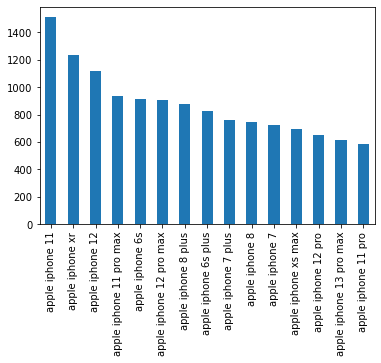

In [6]:
data["phone model"].value_counts().head(15).plot(kind="bar")

<AxesSubplot:>

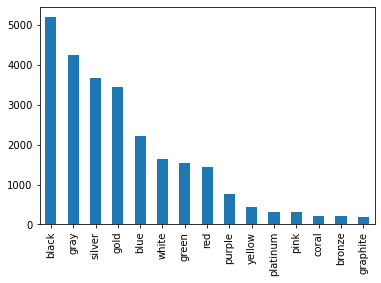

In [7]:
data["phone color"].value_counts().head(15).plot(kind="bar")

<AxesSubplot:>

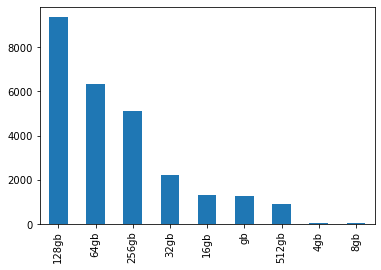

In [8]:
data["phone size"].value_counts().head(15).plot(kind="bar")

In [9]:
all_phones=data.groupby(['phone model','phone color','phone size']).count()
all_phones

claim  weeks_monday
phone model               phone color phone size                     
alcatel axel              black       32gb            5             5
alcatel smartflip 4052r   black       4gb            23            23
alcatel tetra             black       16gb            4             4
apple iphone 11           black       128gb          86            86
                                      256gb          86            86
...                                                 ...           ...
samsung galaxy z fold2 5g bronze      256gb          62            62
samsung galaxy z fold3 5g black       256gb          64            64
                                      512gb           2             2
                          green       256gb          51            51
                          silver      256gb          50            50

[553 rows x 2 columns]

### All Phones Claims distribution by Size

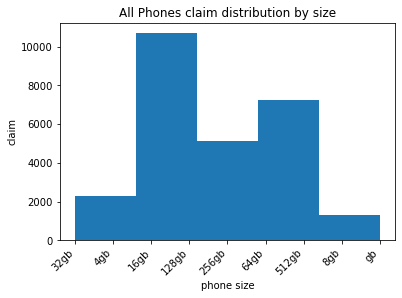

In [10]:
#Plot Histogram
import matplotlib.pyplot as plt

#Plots in matplotlib reside within a figure object, use plt.figure to create new figure
fig=plt.figure()
#Create one or more subplots using add_subplot, because you can't create blank figure
ax = fig.add_subplot(1,1,1)
#Variable
ax.hist(data['phone size'],bins = 5)
#Labels and Tit
plt.title('All Phones claim distribution by size')
plt.xlabel('phone size')
plt.ylabel('claim')
plt.xticks(rotation=45, ha='right')
plt.show()

### (2) All Phones Claims distribution by Color

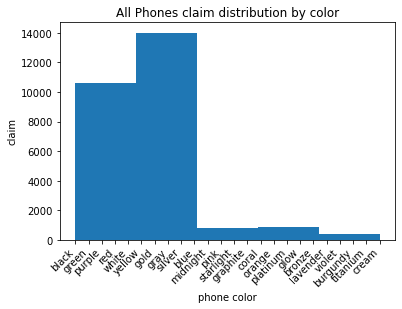

In [11]:
#Plot Histogram
import matplotlib.pyplot as plt

#Plots in matplotlib reside within a figure object, use plt.figure to create new figure
fig=plt.figure()
#Create one or more subplots using add_subplot, because you can't create blank figure
ax = fig.add_subplot(1,1,1)
#Variable
ax.hist(data['phone color'],bins = 5)
#Labels and Tit
plt.title('All Phones claim distribution by color')
plt.xlabel('phone color')
plt.ylabel('claim')
plt.xticks(rotation=45, ha='right')
plt.show()

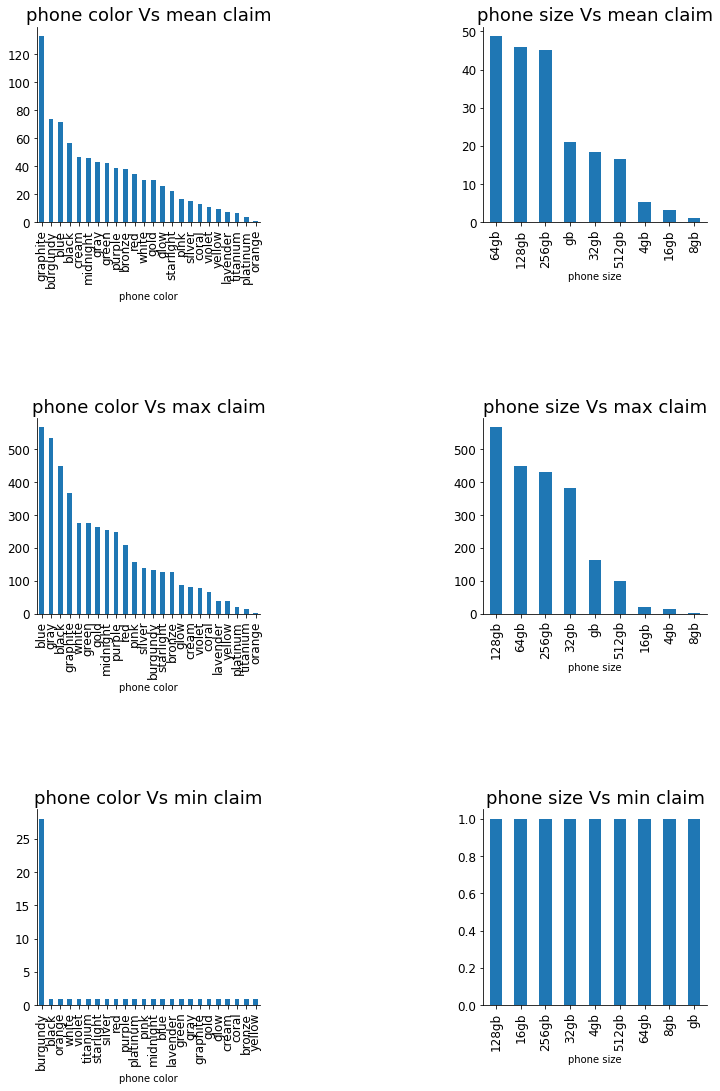

In [12]:
import seaborn as sns


fig, axarr = plt.subplots(3, 2, figsize=(12, 18))
data.groupby('phone color')['claim'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=12)
axarr[0][0].set_title("phone color Vs mean claim", fontsize=18)
data.groupby('phone size')['claim'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][1], fontsize=12)
axarr[0][1].set_title("phone size Vs mean claim", fontsize=18)

data.groupby('phone color')['claim'].max().sort_values(ascending=False).plot.bar(ax=axarr[1][0], fontsize=12)
axarr[1][0].set_title("phone color Vs max claim", fontsize=18)
data.groupby('phone size')['claim'].max().sort_values(ascending=False).plot.bar(ax=axarr[1][1], fontsize=12)
axarr[1][1].set_title("phone size Vs max claim", fontsize=18)

data.groupby('phone color')['claim'].min().sort_values(ascending=False).plot.bar(ax=axarr[2][0], fontsize=12)
axarr[2][0].set_title("phone color Vs min claim", fontsize=18)
data.groupby('phone size')['claim'].min().sort_values(ascending=False).plot.bar(ax=axarr[2][1], fontsize=12)
axarr[2][1].set_title("phone size Vs min claim", fontsize=18)



plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=1.0)
sns.despine()

## 5, Time series for all phones

In [13]:
data.groupby(['phone color','phone size']).count()

phone model  claim  weeks_monday
phone color phone size                                  
black       128gb              1999   1999          1999
            16gb                145    145           145
            256gb               596    596           596
            32gb                852    852           852
            4gb                  48     48            48
...                             ...    ...           ...
white       8gb                   6      6             6
            gb                  189    189           189
yellow      128gb               170    170           170
            256gb                91     91            91
            64gb                166    166           166

[90 rows x 3 columns]

In [14]:
data['all_types'] = data['phone model']+' '+data['phone color'] + ' ' + data['phone size']
all_phone=data[['phone model','all_types','claim','weeks_monday']]
all_phone

,phone model,all_types,claim,weeks_monday
0,alcatel axel,alcatel axel black 32gb,1,2022-01-24
1,alcatel axel,alcatel axel black 32gb,3,2022-11-14
2,alcatel axel,alcatel axel black 32gb,1,2022-11-21
3,alcatel axel,alcatel axel black 32gb,3,2022-11-28
4,alcatel axel,alcatel axel black 32gb,1,2022-12-12
...,...,...,...,...
26656,samsung galaxy z fold3 5g,samsung galaxy z fold3 5g silver 256gb,17,2023-01-30
26657,samsung galaxy z fold3 5g,samsung galaxy z fold3 5g silver 256gb,26,2023-02-06
26658,samsung galaxy z fold3 5g,samsung galaxy z fold3 5g silver 256gb,4,2023-02-13
26659,samsung galaxy z fold3 5g,samsung galaxy z fold3 5g black 512gb,61,2023-02-06


In [15]:
all_phone["all_types"].value_counts()

apple iphone xs max gray 64gb           86
apple iphone 8 plus gold 256gb          86
apple iphone 8 plus red 64gb            86
apple iphone 8 plus gray 64gb           86
apple iphone 12 pro gray 128gb          86
                                        ..
apple iphone se 2022 starlight 256gb     1
apple iphone 14 pro max silver 128gb     1
apple iphone 5c white 8gb                1
apple iphone 4 white 16gb                1
apple iphone 5c green 32gb               1
Name: all_types, Length: 553, dtype: int64

In [16]:
sum_claim=all_phone.groupby(['weeks_monday'], as_index=False)['claim'].sum()
sum_claim

,weeks_monday,claim
0,2021-06-28,4786
1,2021-07-05,11858
2,2021-07-12,11321
3,2021-07-19,11190
4,2021-07-26,11251
...,...,...
81,2023-01-16,15821
82,2023-01-23,15586
83,2023-01-30,13987
84,2023-02-06,16674


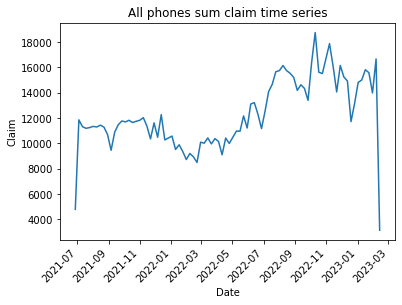

In [17]:
import numpy as np
plt.plot(sum_claim['weeks_monday'],sum_claim['claim'])
plt.xlabel('Date')
plt.ylabel('Claim')
plt.title('All phones sum claim time series')
plt.xticks(rotation=45, ha='right')
plt.show()

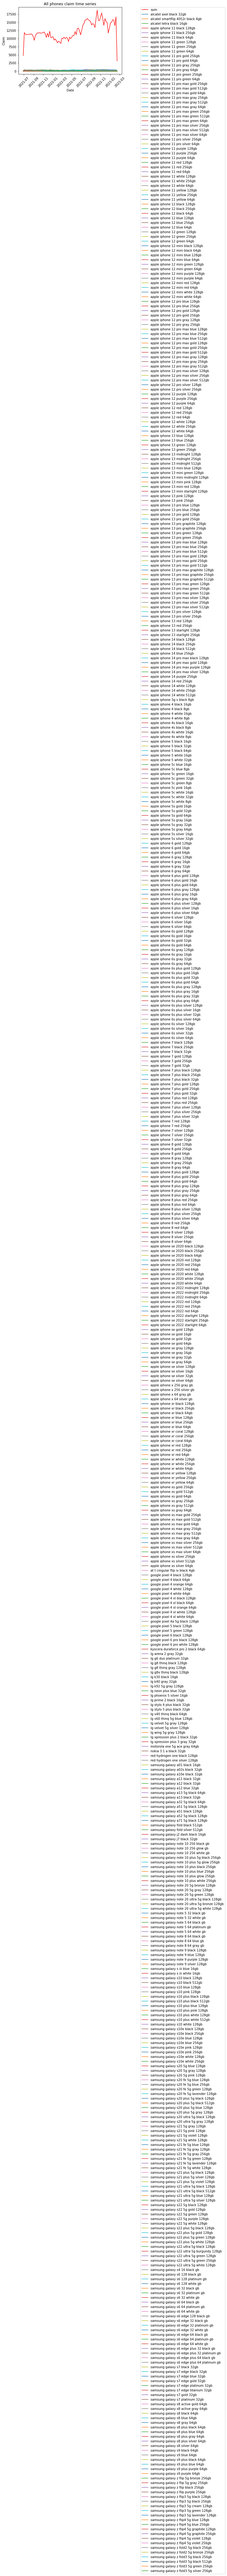

In [18]:
# group the data by 'type'
grouped = all_phone.groupby('all_types')

plt.plot(sum_claim['weeks_monday'],sum_claim['claim'],"red",label="sum")
# plot the data for each group
for name, group in grouped:
    plt.plot(group['weeks_monday'],group['claim'], label=name)
    

# add a legend and labels for the x and y axis
plt.legend(bbox_to_anchor=(2, 1), loc="upper right", borderaxespad=0.)
plt.xlabel('Date')
plt.ylabel('Claim')
plt.title('All phones claim time series')
plt.xticks(rotation=45)
#plt.ylim(0, 18000)
# show the plot
plt.show()

## 6, Time series for other phones(except iphone) 

In [19]:
except_iph=data[-data['phone model'].str.startswith('apple')]
except_iph

,phone model,phone size,phone color,claim,weeks_monday,all_types
0,alcatel axel,32gb,black,1,2022-01-24,alcatel axel black 32gb
1,alcatel axel,32gb,black,3,2022-11-14,alcatel axel black 32gb
2,alcatel axel,32gb,black,1,2022-11-21,alcatel axel black 32gb
3,alcatel axel,32gb,black,3,2022-11-28,alcatel axel black 32gb
4,alcatel axel,32gb,black,1,2022-12-12,alcatel axel black 32gb
...,...,...,...,...,...,...
26656,samsung galaxy z fold3 5g,256gb,silver,17,2023-01-30,samsung galaxy z fold3 5g silver 256gb
26657,samsung galaxy z fold3 5g,256gb,silver,26,2023-02-06,samsung galaxy z fold3 5g silver 256gb
26658,samsung galaxy z fold3 5g,256gb,silver,4,2023-02-13,samsung galaxy z fold3 5g silver 256gb
26659,samsung galaxy z fold3 5g,512gb,black,61,2023-02-06,samsung galaxy z fold3 5g black 512gb


In [20]:
except_iph['phone model'].value_counts()

samsung galaxy s10 plus       425
samsung galaxy s7 edge        293
samsung galaxy note 9         276
samsung galaxy s8             268
samsung galaxy s8 plus        263
                             ... 
alcatel axel                    5
samsung galaxy z flip           4
alcatel tetra                   4
samsung galaxy fold             2
samsung galaxy s6 edge 128      2
Name: phone model, Length: 93, dtype: int64

In [21]:
other_sum_claim=except_iph.groupby(['weeks_monday'], as_index=False)['claim'].sum()
other_sum_claim

,weeks_monday,claim
0,2021-06-28,1010
1,2021-07-05,2209
2,2021-07-12,2215
3,2021-07-19,2230
4,2021-07-26,2337
...,...,...
81,2023-01-16,4107
82,2023-01-23,3983
83,2023-01-30,3539
84,2023-02-06,3889


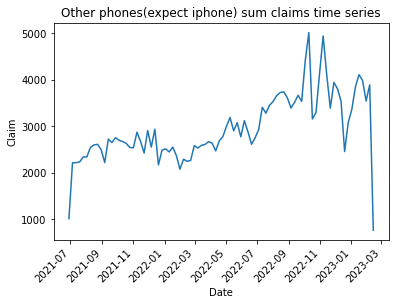

In [22]:
import numpy as np
plt.plot(other_sum_claim['weeks_monday'],other_sum_claim['claim'])
plt.xlabel('Date')
plt.ylabel('Claim')
plt.title('Other phones(expect iphone) sum claims time series')
plt.xticks(rotation=45, ha='right')
plt.show()

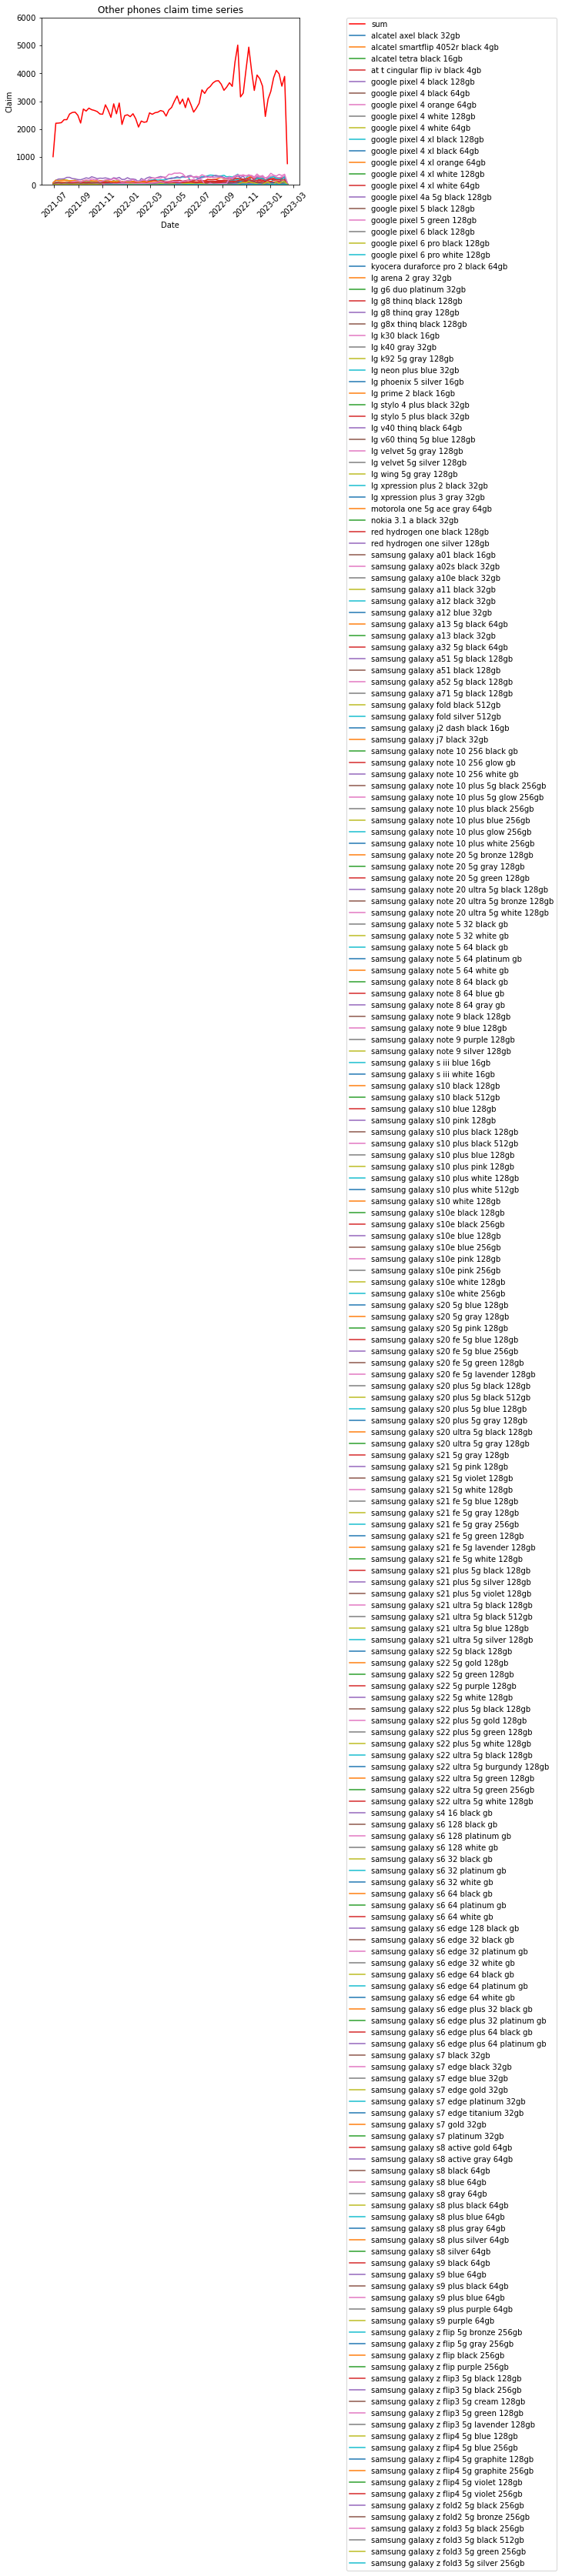

In [23]:
# group the data by 'type'
grouped = except_iph.groupby('all_types')

plt.plot(other_sum_claim['weeks_monday'],other_sum_claim['claim'],"red",label="sum")


# plot the data for each group
for name, group in grouped:
    plt.plot(group['weeks_monday'],group['claim'], label=name)
    
# add a legend and labels for the x and y axis
plt.legend(bbox_to_anchor=(2, 1), loc="upper right", borderaxespad=0.)
plt.xlabel('Date')
plt.ylabel('Claim')
plt.title('Other phones claim time series')
plt.xticks(rotation=45)
plt.ylim(0, 6000)
# show the plot
plt.show()

## 7, Time Series for all iphones

In [24]:
iph=data[data['phone model'].str.startswith('apple')]
iph_sum_claim=iph.groupby(['weeks_monday'], as_index=False)['claim'].sum()
iph_sum_claim

,weeks_monday,claim
0,2021-06-28,3776
1,2021-07-05,9649
2,2021-07-12,9106
3,2021-07-19,8960
4,2021-07-26,8914
...,...,...
81,2023-01-16,11714
82,2023-01-23,11603
83,2023-01-30,10448
84,2023-02-06,12785


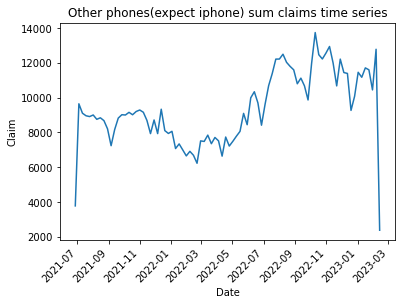

In [25]:
import numpy as np
plt.plot(iph_sum_claim['weeks_monday'],iph_sum_claim['claim'])
plt.xlabel('Date')
plt.ylabel('Claim')
plt.title('Other phones(expect iphone) sum claims time series')
plt.xticks(rotation=45, ha='right')
plt.show()

## 8, Compare claims among all phones, iphones, and other phones

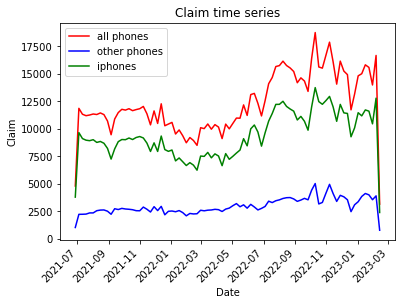

In [26]:
plt.plot(sum_claim['weeks_monday'],sum_claim['claim'],"red",label="all phones")
plt.plot(other_sum_claim['weeks_monday'],other_sum_claim['claim'],"blue",label="other phones")
plt.plot(iph_sum_claim['weeks_monday'],iph_sum_claim['claim'],"green",label="iphones")
plt.legend()
plt.xlabel('Date')
plt.ylabel('Claim')
plt.title('Claim time series')
plt.xticks(rotation=45, ha='right')
plt.show()

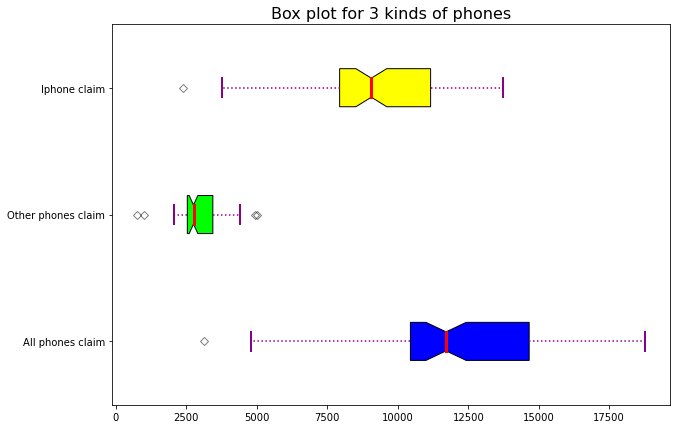

In [27]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
 
# Creating axes instance
data=[sum_claim['claim'], other_sum_claim['claim'],iph_sum_claim['claim']]

bp = ax.boxplot(data, patch_artist = True,
                notch ='True', vert = 0)
 
colors = ['#0000FF', '#00FF00',
          '#FFFF00', '#FF00FF']
 
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")
    
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)
    
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)
     
# x-axis labels
ax.set_yticklabels(['All phones claim', 'Other phones claim',
                    'Iphone claim'])
 
# Adding title
plt.title("Box plot for 3 kinds of phones",size=16)
 
# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
     
# show plot
plt.show()